# Overview of the project
## This project deals with some work as following:
<br> Gene expression dataset (Golub et al.) dataset is used in this work
<br> Data Processing
<br> Principal component analysis (PCA) implementation
<br> Using Logistic Regression and Support Vector Machines with different kernels on data train and data test with and without pre-processing by PCA and compare all the results based on accuracy_score.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html
from itertools import chain,cycle

In [71]:
df_train = pd.read_csv("Train_data.csv")
df_test = pd.read_csv("Test_data.csv")
df_actual = pd.read_csv("actual.csv")

In [72]:
df_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [73]:
df_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [74]:
df_actual.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [75]:
def display(*args,titles=cycle([''])):
    disp_ =''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        disp_+='<th style="text-align:center"><td style="vertical-align:top">'
        disp_+=f'<h2 style="text-align: center;">{title}</h2>'
        disp_+=df.to_html().replace('table','table style="display:inline"')
        disp_+='</td></th>'
    display_html(disp_,raw=True)

In [76]:
display(df_train.head(),df_test.head(),df_actual.head(), titles=['df_train','df_test','df_actual'])

df_train 
 
 
 
 Gene Description 
 Gene Accession Number 
 1 
 call 
 2 
 call.1 
 3 
 call.2 
 4 
 call.3 
 5 
 call.4 
 6 
 call.5 
 7 
 call.6 
 8 
 call.7 
 9 
 call.8 
 10 
 call.9 
 11 
 call.10 
 12 
 call.11 
 13 
 call.12 
 14 
 call.13 
 15 
 call.14 
 16 
 call.15 
 17 
 call.16 
 18 
 call.17 
 19 
 call.18 
 20 
 call.19 
 21 
 call.20 
 22 
 call.21 
 23 
 call.22 
 24 
 call.23 
 25 
 call.24 
 26 
 call.25 
 27 
 call.26 
 34 
 call.27 
 35 
 call.28 
 36 
 call.29 
 37 
 call.30 
 38 
 call.31 
 28 
 call.32 
 29 
 call.33 
 30 
 call.34 
 31 
 call.35 
 32 
 call.36 
 33 
 call.37 
 
 
 
 
 0 
 AFFX-BioB-5_at (endogenous control) 
 AFFX-BioB-5_at 
 -214 
 A 
 -139 
 A 
 -76 
 A 
 -135 
 A 
 -106 
 A 
 -138 
 A 
 -72 
 A 
 -413 
 A 
 5 
 A 
 -88 
 A 
 -165 
 A 
 -67 
 A 
 -92 
 A 
 -113 
 A 
 -107 
 A 
 -117 
 A 
 -476 
 A 
 -81 
 A 
 -44 
 A 
 17 
 A 
 -144 
 A 
 -247 
 A 
 -74 
 A 
 -120 
 A 
 -81 
 A 
 -112 
 A 
 -273 
 A 
 -20 
 A 
 7 
 A 
 -213 
 A 
 -25 
 A 
 -72 
 A 
 -4 
 A 
 15 
 A 
 -318 
 A 
 -32 
 A 
 -124 
 A 
 -135 
 A 
 
 
 1 
 AFFX-BioB-M_at (endogenous control) 
 AFFX-BioB-M_at 
 -153 
 A 
 -73 
 A 
 -49 
 A 
 -114 
 A 
 -125 
 A 
 -85 
 A 
 -144 
 A 
 -260 
 A 
 -127 
 A 
 -105 
 A 
 -155 
 A 
 -93 
 A 
 -119 
 A 
 -147 
 A 
 -72 
 A 
 -219 
 A 
 -213 
 A 
 -150 
 A 
 -51 
 A 
 -229 
 A 
 -199 
 A 
 -90 
 A 
 -321 
 A 
 -263 
 A 
 -150 
 A 
 -233 
 A 
 -327 
 A 
 -207 
 A 
 -100 
 A 
 -252 
 A 
 -20 
 A 
 -139 
 A 
 -116 
 A 
 -114 
 A 
 -192 
 A 
 -49 
 A 
 -79 
 A 
 -186 
 A 
 
 
 2 
 AFFX-BioB-3_at (endogenous control) 
 AFFX-BioB-3_at 
 -58 
 A 
 -1 
 A 
 -307 
 A 
 265 
 A 
 -76 
 A 
 215 
 A 
 238 
 A 
 7 
 A 
 106 
 A 
 42 
 A 
 -71 
 A 
 84 
 A 
 -31 
 A 
 -118 
 A 
 -126 
 A 
 -50 
 A 
 -18 
 A 
 -119 
 A 
 100 
 A 
 79 
 A 
 -157 
 A 
 -168 
 A 
 -11 
 A 
 -114 
 A 
 -85 
 A 
 -78 
 A 
 -76 
 A 
 -50 
 A 
 -57 
 A 
 136 
 A 
 124 
 A 
 -1 
 A 
 -125 
 A 
 2 
 A 
 -95 
 A 
 49 
 A 
 -37 
 A 
 -70 
 A 
 
 
 3 
 AFFX-BioC-5_at (endogenous control) 
 AFFX-BioC-5_at 
 88 
 A 
 283 
 A 
 309 
 A 
 12 
 A 
 168 
 A 
 71 
 A 
 55 
 A 
 -2 
 A 
 268 
 A 
 219 
 M 
 82 
 A 
 25 
 A 
 173 
 A 
 243 
 M 
 149 
 A 
 257 
 A 
 301 
 A 
 78 
 A 
 207 
 A 
 218 
 A 
 132 
 A 
 -24 
 A 
 -36 
 A 
 255 
 A 
 316 
 A 
 54 
 A 
 81 
 A 
 101 
 A 
 132 
 A 
 318 
 A 
 325 
 A 
 392 
 P 
 241 
 A 
 193 
 A 
 312 
 A 
 230 
 P 
 330 
 A 
 337 
 A 
 
 
 4 
 AFFX-BioC-3_at (endogenous control) 
 AFFX-BioC-3_at 
 -295 
 A 
 -264 
 A 
 -376 
 A 
 -419 
 A 
 -230 
 A 
 -272 
 A 
 -399 
 A 
 -541 
 A 
 -210 
 A 
 -178 
 A 
 -163 
 A 
 -179 
 A 
 -233 
 A 
 -127 
 A 
 -205 
 A 
 -218 
 A 
 -403 
 A 
 -152 
 A 
 -146 
 A 
 -262 
 A 
 -151 
 A 
 -308 
 A 
 -317 
 A 
 -342 
 A 
 -418 
 A 
 -244 
 A 
 -439 
 A 
 -369 
 A 
 -377 
 A 
 -209 
 A 
 -396 
 A 
 -324 
 A 
 -191 
 A 
 -51 
 A 
 -139 
 A 
 -367 
 A 
 -188 
 A 
 -407 
 A 
 
 
 df_test 
 
 
 
 Gene Description 
 Gene Accession Number 
 39 
 call 
 40 
 call.1 
 42 
 call.2 
 47 
 call.3 
 48 
 call.4 
 49 
 call.5 
 41 
 call.6 
 43 
 call.7 
 44 
 call.8 
 45 
 call.9 
 46 
 call.10 
 70 
 call.11 
 71 
 call.12 
 72 
 call.13 
 68 
 call.14 
 69 
 call.15 
 67 
 call.16 
 55 
 call.17 
 56 
 call.18 
 59 
 call.19 
 52 
 call.20 
 53 
 call.21 
 51 
 call.22 
 50 
 call.23 
 54 
 call.24 
 57 
 call.25 
 58 
 call.26 
 60 
 call.27 
 61 
 call.28 
 65 
 call.29 
 66 
 call.30 
 63 
 call.31 
 64 
 call.32 
 62 
 call.33 
 
 
 
 
 0 
 AFFX-BioB-5_at (endogenous control) 
 AFFX-BioB-5_at 
 -342 
 A 
 -87 
 A 
 22 
 A 
 -243 
 A 
 -130 
 A 
 -256 
 A 
 -62 
 A 
 86 
 A 
 -146 
 A 
 -187 
 A 
 -56 
 A 
 -55 
 A 
 -59 
 A 
 -131 
 A 
 -154 
 A 
 -79 
 A 
 -76 
 A 
 -34 
 A 
 -95 
 A 
 -12 
 A 
 -21 
 A 
 -202 
 A 
 -112 
 A 
 -118 
 A 
 -90 
 A 
 -137 
 A 
 -157 
 A 
 -172 
 A 
 -47 
 A 
 -62 
 A 
 -58 
 A 
 -161 
 A 
 -48 
 A 
 -176 
 A 
 
 
 1 
 AFFX-BioB-M_at (endogenous control) 
 AFFX-BioB-M_at 
 -200 
 A 
 -248 
 A 
 -153 
 A 
 -218 
 A 
 -177 
 A 
 -249 


# Data Processing

In [77]:
#Drop the call columns
df_train = df_train.drop(df_train.filter(regex='call').columns, axis=1)
df_test = df_test.drop(df_test.filter(regex='call').columns, axis=1)

In [78]:
#Transpose the two tables, each row represents a record of a number
#Each column represents a gene
df_test = df_test.T
df_train = df_train.T



In [79]:
df_test.index

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [80]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [81]:
#Then drop the 2 rows which is the Gene Descriptio and Gene Accession Number in the two tables
df_test = df_test.drop(["Gene Description", "Gene Accession Number"])
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [82]:
#Then drop the 2 rows which are the Gene Descriptio and Gene Accession Number in the two tables
df_train = df_train.drop(["Gene Description", "Gene Accession Number"])
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [83]:
#Join the two tables with its result from the actual table
df_train = df_train.reset_index().rename(columns={'index':'patient'})
df_test = df_test.reset_index().rename(columns={'index':'patient'})
df_actual['patient'] = df_actual['patient'].astype('str')

In [84]:
#The final data for testing and data for training
df_train = df_train.merge(df_actual,on='patient',how='left')
df_test = df_test.merge(df_actual,on='patient',how='left')

In [85]:
df_train.head()

,patient,0,1,2,3,4,5,6,7,8,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,511,-125,389,-37,793,329,36,191,-37,ALL
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,837,-36,442,-17,782,295,11,76,-14,ALL
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,1199,33,168,52,1138,777,41,228,-41,ALL
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,835,218,174,-110,627,170,-50,126,-91,ALL
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,649,57,504,-26,250,314,14,56,-25,ALL


In [86]:
df_test.head()

,patient,0,1,2,3,4,5,6,7,8,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,39,-342,-200,41,328,-224,-427,-656,-292,137,...,1023,67,214,-135,1074,475,48,168,-70,ALL
1,40,-87,-248,262,295,-226,-493,367,-452,194,...,529,-295,352,-67,67,263,-33,-33,-21,ALL
2,42,22,-153,17,276,-211,-250,55,-141,0,...,399,16,558,24,893,297,6,1971,-42,ALL
3,47,-243,-218,-163,182,-289,-268,-285,-172,52,...,277,6,81,2,722,170,0,510,-73,ALL
4,48,-130,-177,-28,266,-170,-326,-222,-93,10,...,643,51,450,-46,612,370,29,333,-19,ALL


In [87]:
#To test whether or not there is any missing value
#The result is 0 which means there is no NA
d1 = df_train.isna().sum().sum()
d2 = df_test.isna().sum().sum()
print(f"There are {d1} missing values in df_train and {d2} missing values in df_test")

There are 0 missing values in df_train and 0 missing values in df_test


# Principal component analysis (or PCA)
<br>PCA is a dimensionality reduction technique that transforms a set of features in a dataset into a smaller number of features called principal components while at the same time trying to retain as much information in the original dataset as possible
<br> But one of the disadvantages of PCA is information loss. Data loss may occur if you do not exercise care in choosing the right number of components => We will see how it performs compared to data not processing by PCA in this project.

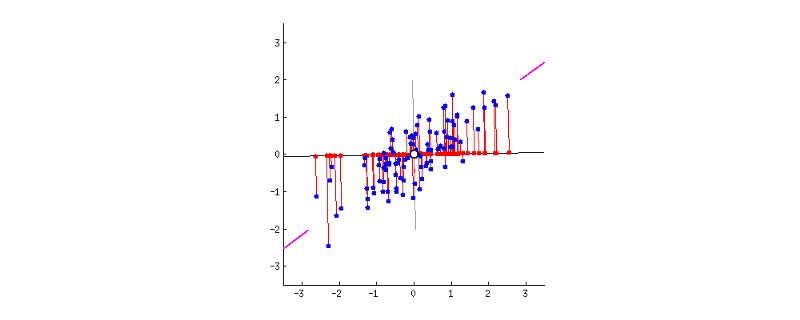

### Data scaling and transformation

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

In [90]:
#Drop the target/response variable and the patient
X_train_all_features = df_train.drop(["patient","cancer"],axis=1)
X_test_all_features = df_test.drop(["patient","cancer"],axis=1)

In [91]:
x_train_scaled = scaler_train.fit_transform(X_train_all_features)
x_test_scaled = scaler_test.fit_transform(X_test_all_features)

In [92]:
x_test_scaled

array([[-2.84438044, -0.25722318,  0.30599962, ...,  0.90925242,
        -0.39431458, -0.78486095],
       [ 0.24943193, -0.68082382,  2.04392943, ..., -0.58750859,
        -0.81989036,  0.22955204],
       [ 1.57188506,  0.15755244,  0.11726516, ...,  0.13315412,
         3.42316367, -0.20519638],
       ...,
       [-0.64838029, -0.38959838, -0.3781628 , ..., -0.01467413,
        -0.3053883 ,  0.99553735],
       [ 0.72260323, -3.17830257, -0.99154979, ...,  0.02228293,
        -0.14870866, -0.84696786],
       [-0.83036925, -0.9985243 , -0.65340055, ...,  0.39185356,
         0.05243412, -0.57783789]])

## PCA

In [93]:
from sklearn.decomposition import PCA

In [94]:
x_pca_train = PCA(n_components=30)
x_pca_test = PCA(n_components=30)

x_pca_train.fit(x_train_scaled)
x_pca_test.fit(x_test_scaled)

PCA(n_components=30)

In [95]:
#Transform
X_train = x_pca_train.transform(x_train_scaled)
x_test = x_pca_test.transform(x_test_scaled)

## Number of features left after transformation

In [96]:
X_train.shape

(38, 30)

In [97]:
x_test.shape

(34, 30)

In [98]:
x_test_scaled.shape

(34, 7129)

In [99]:
cols = [f"PC{i}" for i in range(1,31)]
df_train_pca = pd.DataFrame(X_train,columns=cols)
df_test_pca = pd.DataFrame(x_test,columns=cols)

In [100]:
df_test.head()

,patient,0,1,2,3,4,5,6,7,8,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,39,-342,-200,41,328,-224,-427,-656,-292,137,...,1023,67,214,-135,1074,475,48,168,-70,ALL
1,40,-87,-248,262,295,-226,-493,367,-452,194,...,529,-295,352,-67,67,263,-33,-33,-21,ALL
2,42,22,-153,17,276,-211,-250,55,-141,0,...,399,16,558,24,893,297,6,1971,-42,ALL
3,47,-243,-218,-163,182,-289,-268,-285,-172,52,...,277,6,81,2,722,170,0,510,-73,ALL
4,48,-130,-177,-28,266,-170,-326,-222,-93,10,...,643,51,450,-46,612,370,29,333,-19,ALL


In [101]:
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,18.544799,5.826943,-19.442313,-11.267566,5.303304,19.100937,-9.447438,0.915309,-8.665217,-7.912754,...,-6.697653,6.323438,5.630107,-4.538090,-14.672156,4.899964,9.335462,-12.552358,2.484640,12.217094
1,-7.341389,10.008663,11.795698,3.920823,-13.999094,-18.636026,4.687060,8.812418,1.372678,-11.690751,...,5.596218,-11.423156,-10.669290,-5.364779,-20.280586,7.685347,23.676243,5.216321,17.828269,-1.015588
2,52.852146,11.390630,-29.548566,-38.800348,-22.866689,-9.458113,-22.880735,20.995112,4.038731,-5.260765,...,5.996148,1.847696,5.073579,0.797486,0.995521,-0.354742,-0.093794,2.769450,-2.868344,7.354274
3,13.688551,-6.246839,-22.623318,-3.982670,-1.351354,13.095198,29.457761,-10.493627,-12.248064,22.248153,...,24.963274,-0.718683,1.204654,8.036715,21.272887,20.388530,9.384894,1.410416,24.731438,-8.574276
4,-36.790106,32.799698,5.253314,-2.790336,-6.602306,10.731372,2.410778,-4.505205,-9.751938,1.651788,...,1.378026,6.278746,5.829900,-0.235727,3.875653,-2.760198,-2.021964,-2.234259,-2.444749,14.045705


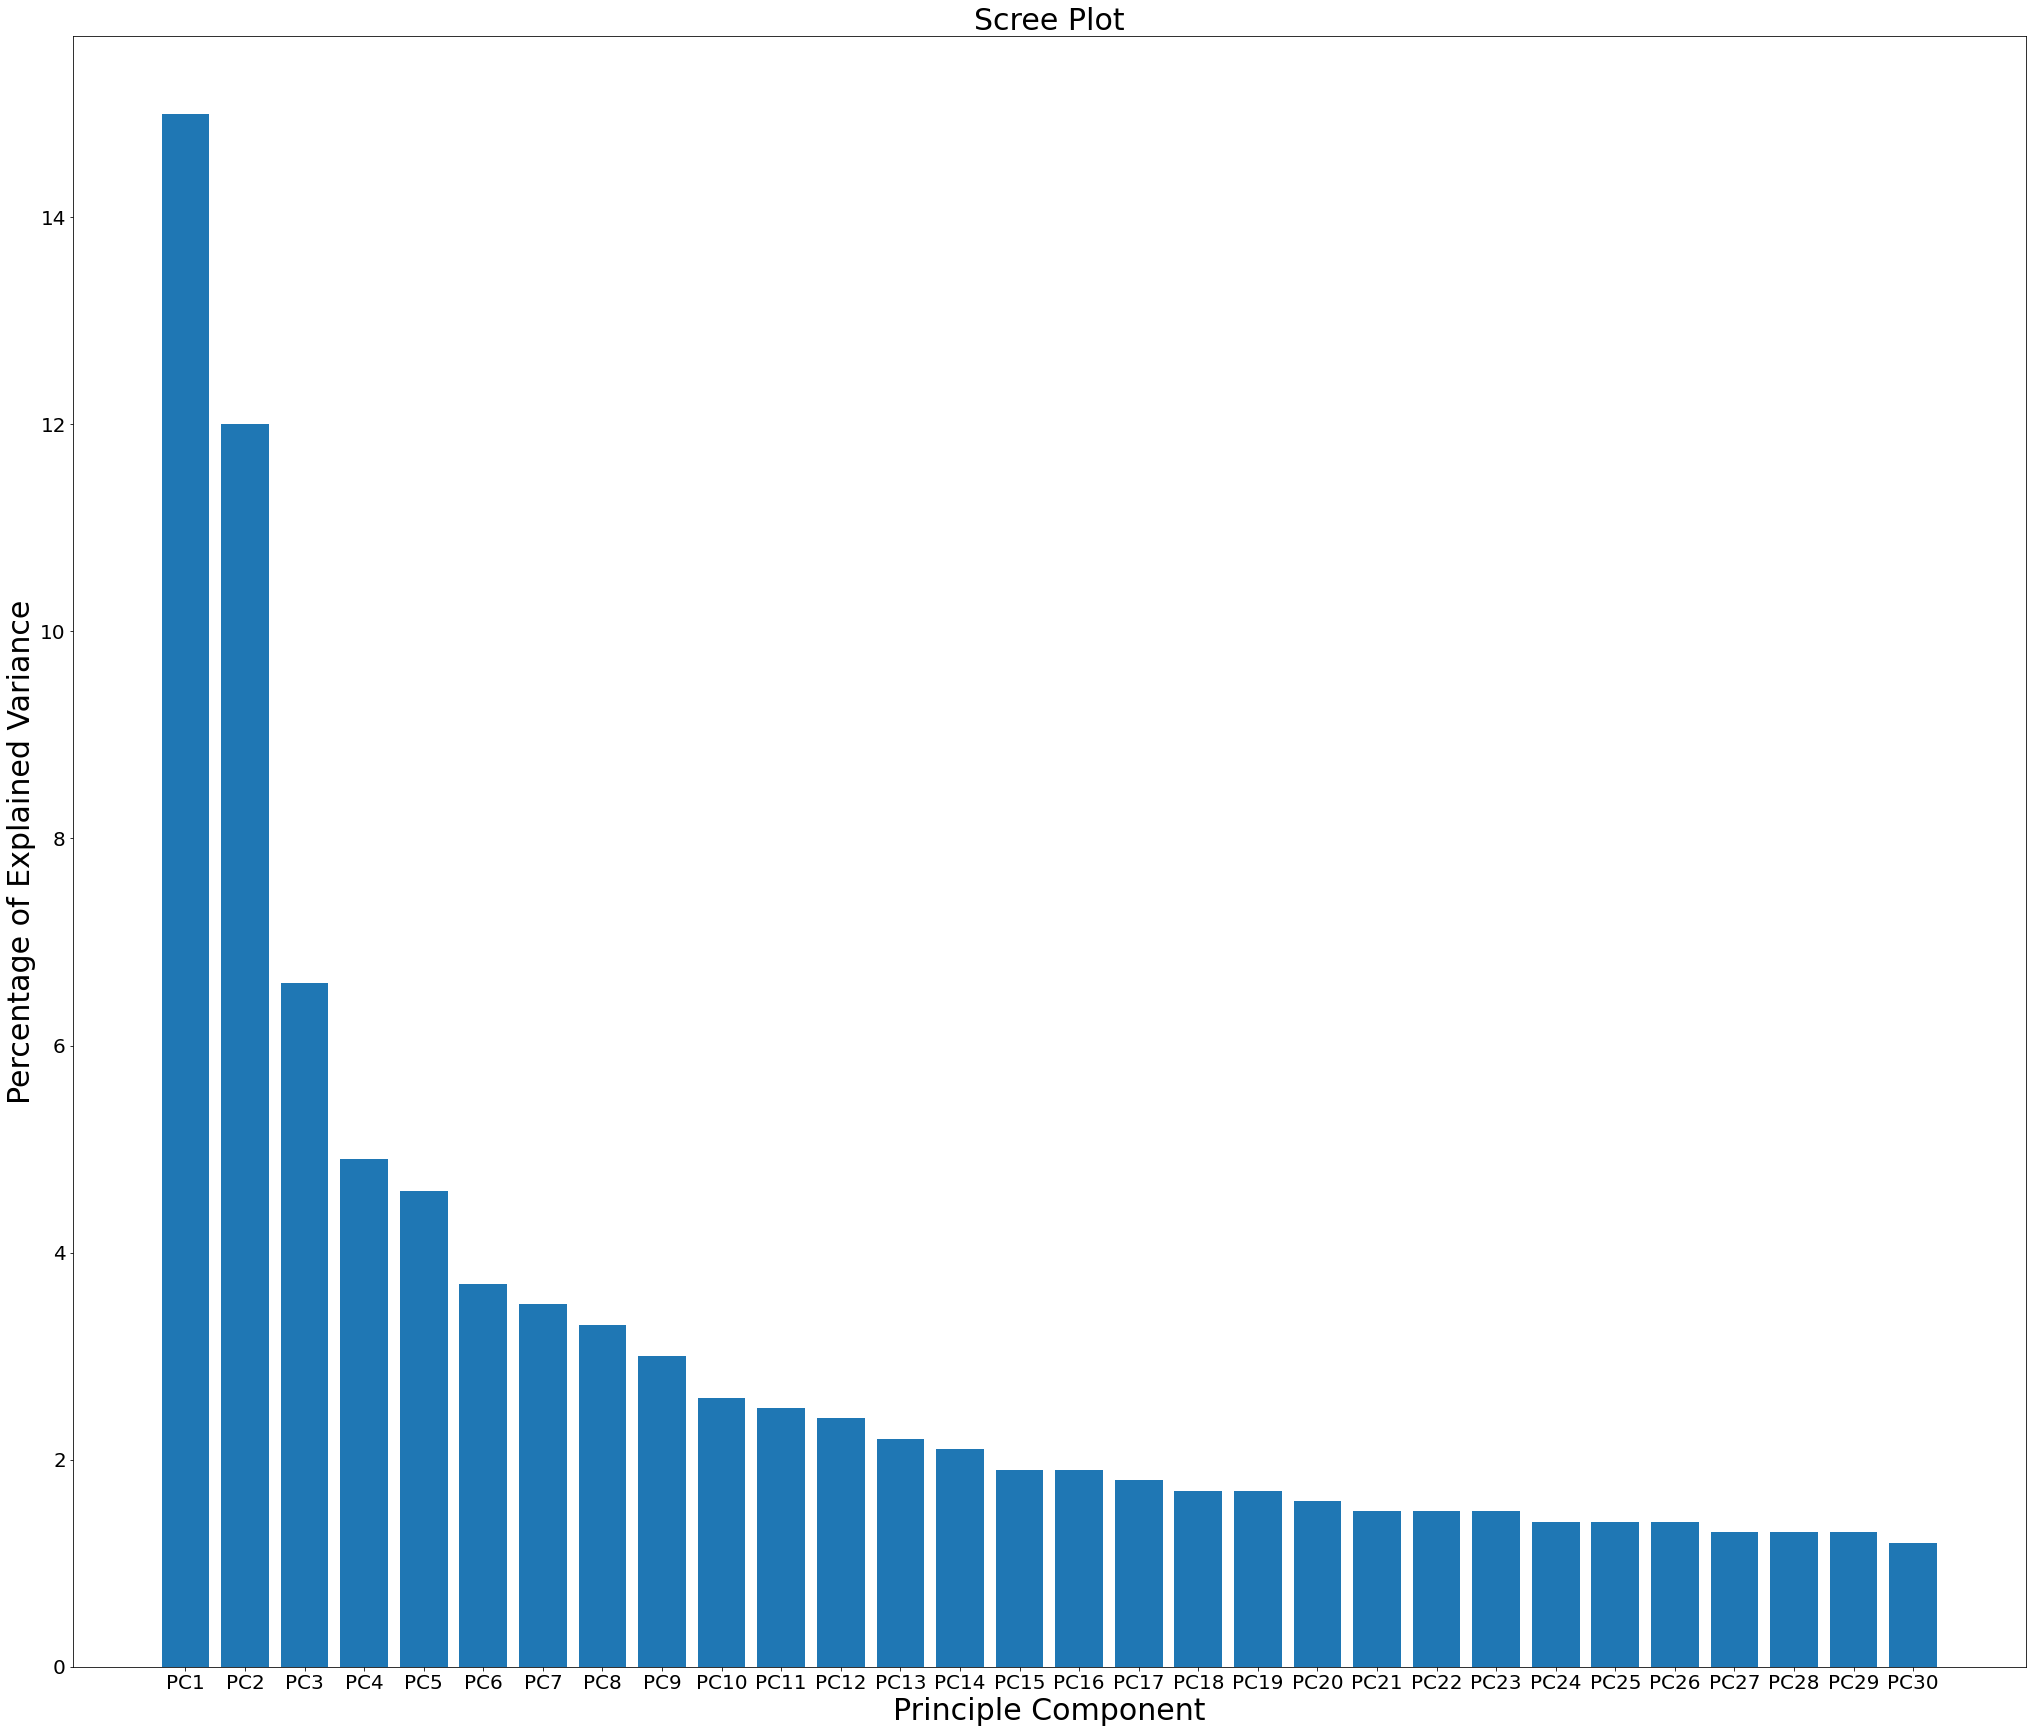

In [102]:
## Scree plot for X_train
var_ = np.round(x_pca_train.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(i) for i in range(1,31)]
plt.figure(figsize=(35,30))
plt.bar(x=range(1,31),height=var_,tick_label=labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Percentage of Explained Variance",fontsize=30)
plt.xlabel("Principle Component",fontsize=30)
plt.title("Scree Plot",fontsize=30)

plt.show()

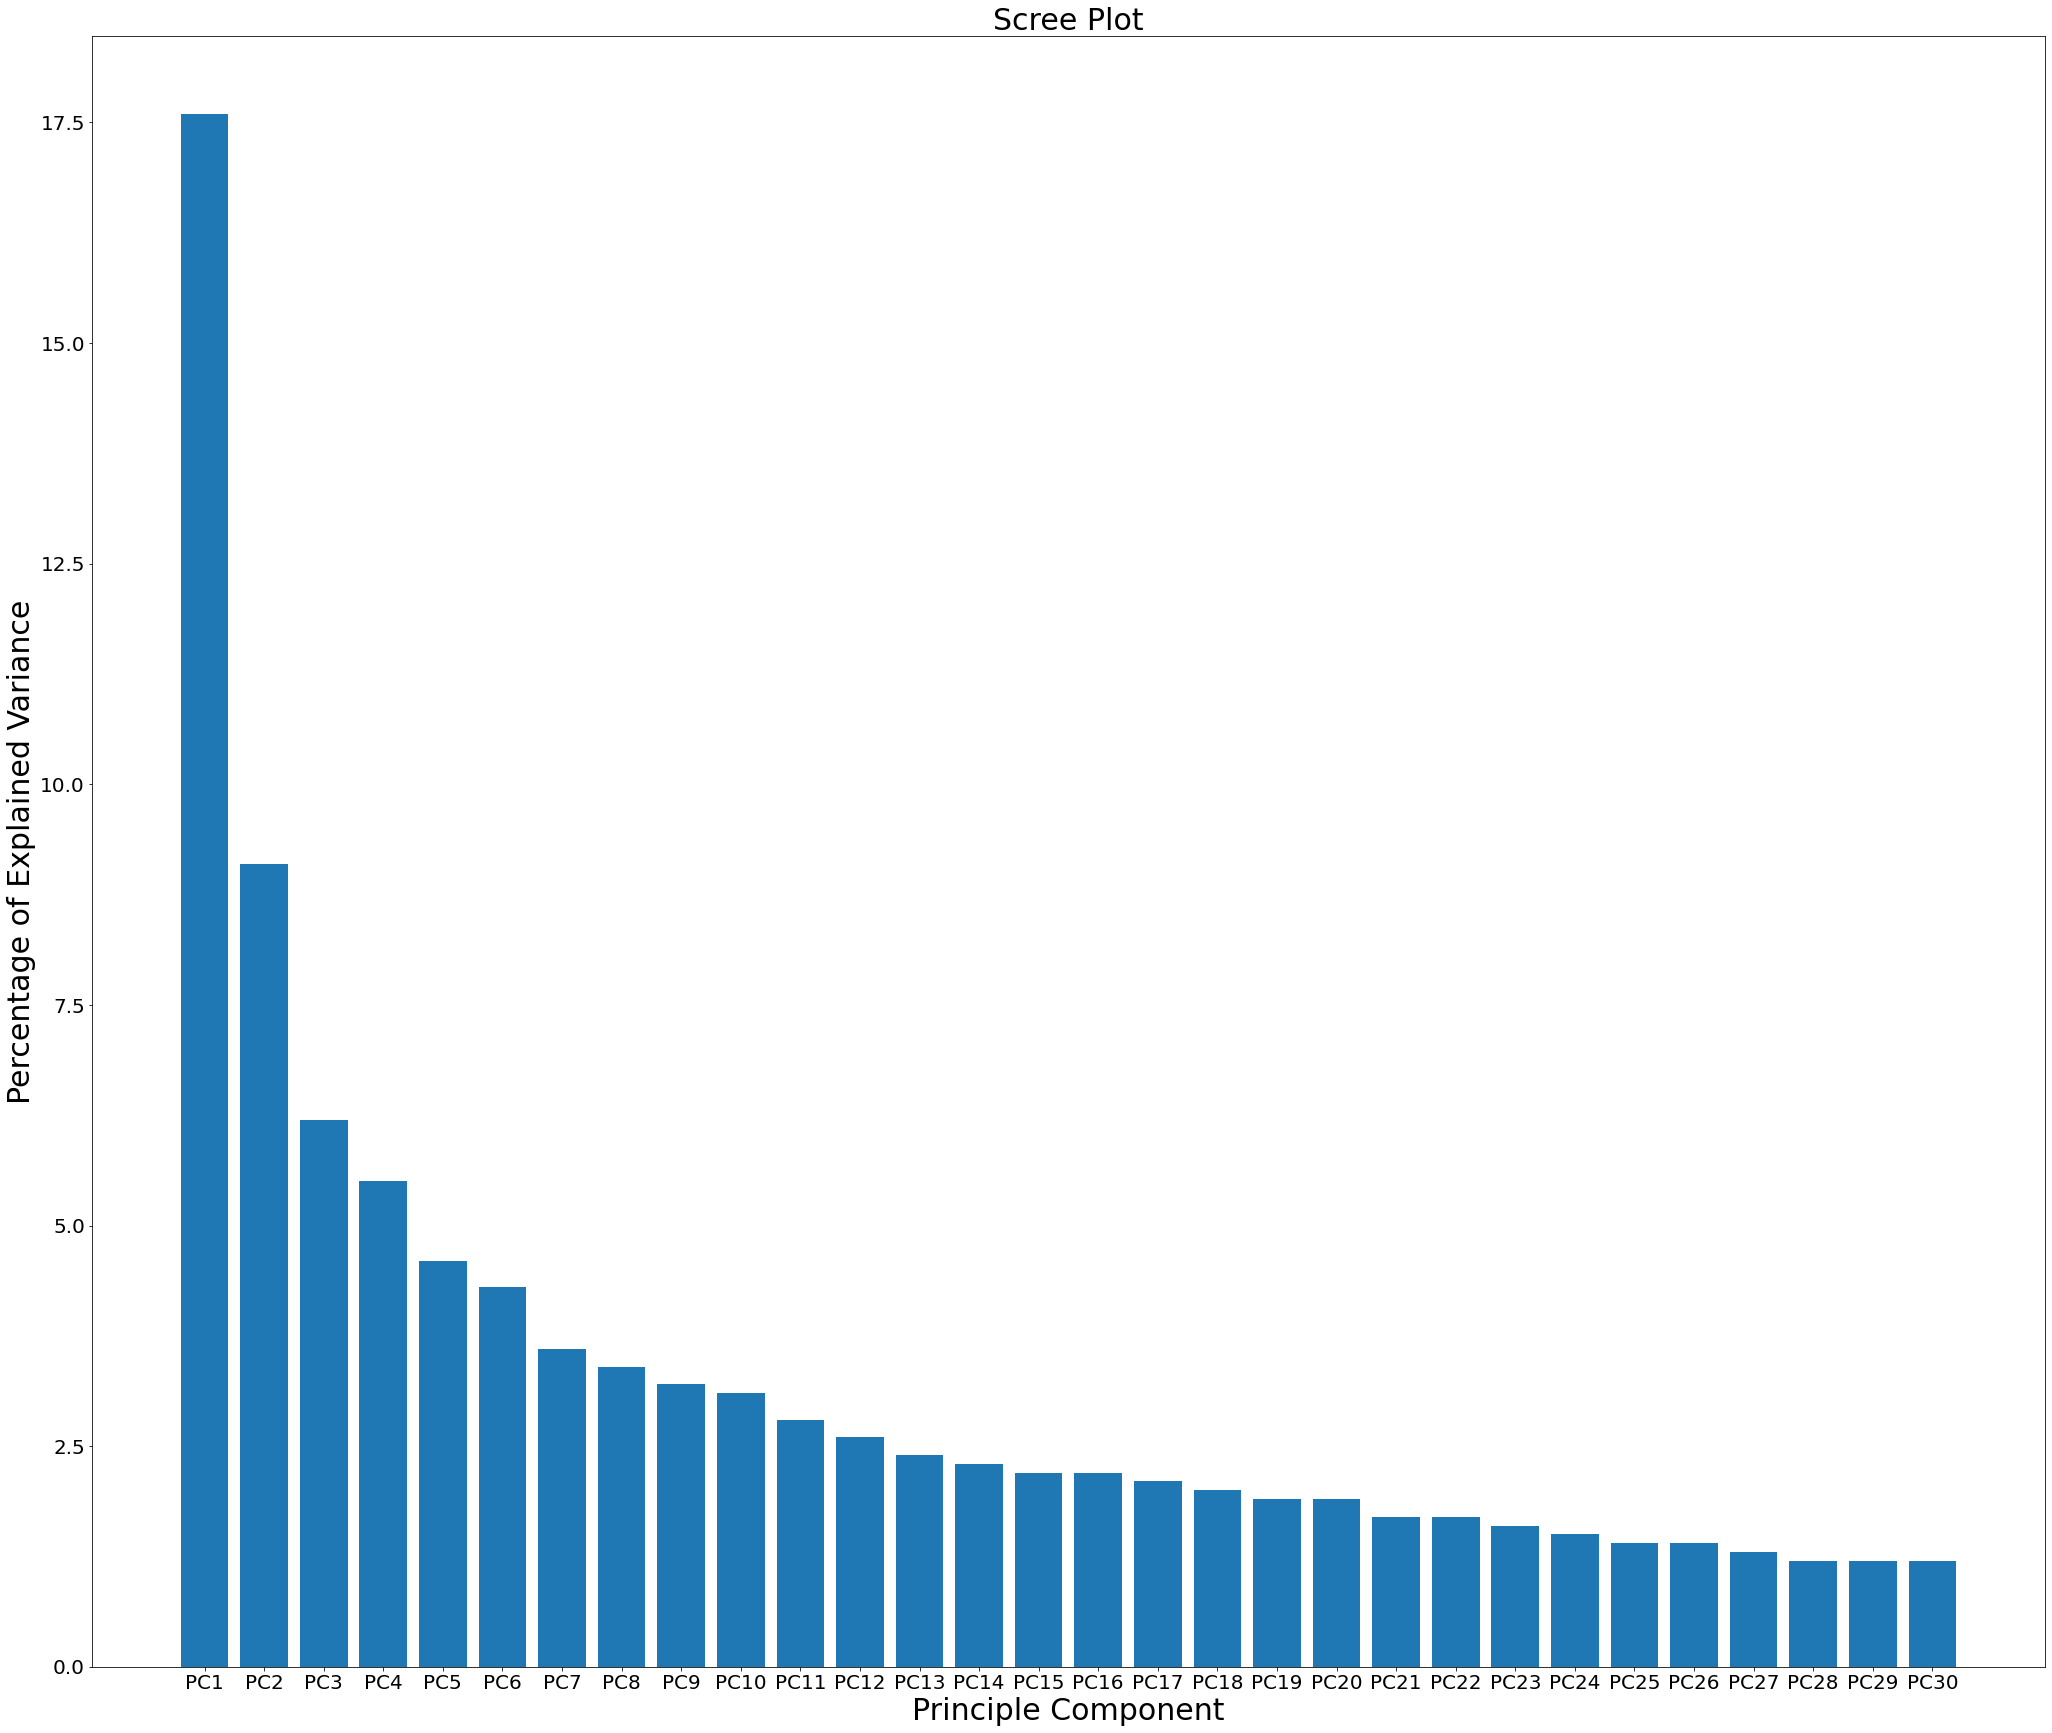

In [103]:
## Scree plot for X_train
var_ = np.round(x_pca_test.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(i) for i in range(1,31)]
plt.figure(figsize=(35,30))
plt.bar(x=range(1,31),height=var_,tick_label=labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Percentage of Explained Variance",fontsize=30)
plt.xlabel("Principle Component",fontsize=30)
plt.title("Scree Plot",fontsize=30)

plt.show()

## Comment
<br> 1. Not all the variation is along the first or second for even third PC, but, we can temporarily use the first 3 PCs to represent the original data. The same for data train and data test.
<br> 2. Explained Variance tells us how much of the total variance is “explained” by each component.  The larger the variance explained by a principal component, the more important that component is, the amount of variance explained by each direction is called the “explained variance.”

## 3-d plot of the first 3 PCs
(Only draw for the training set)

In [104]:
df_train["cancer"].unique()

array(['ALL', 'AML'], dtype=object)

In [105]:
%matplotlib inline

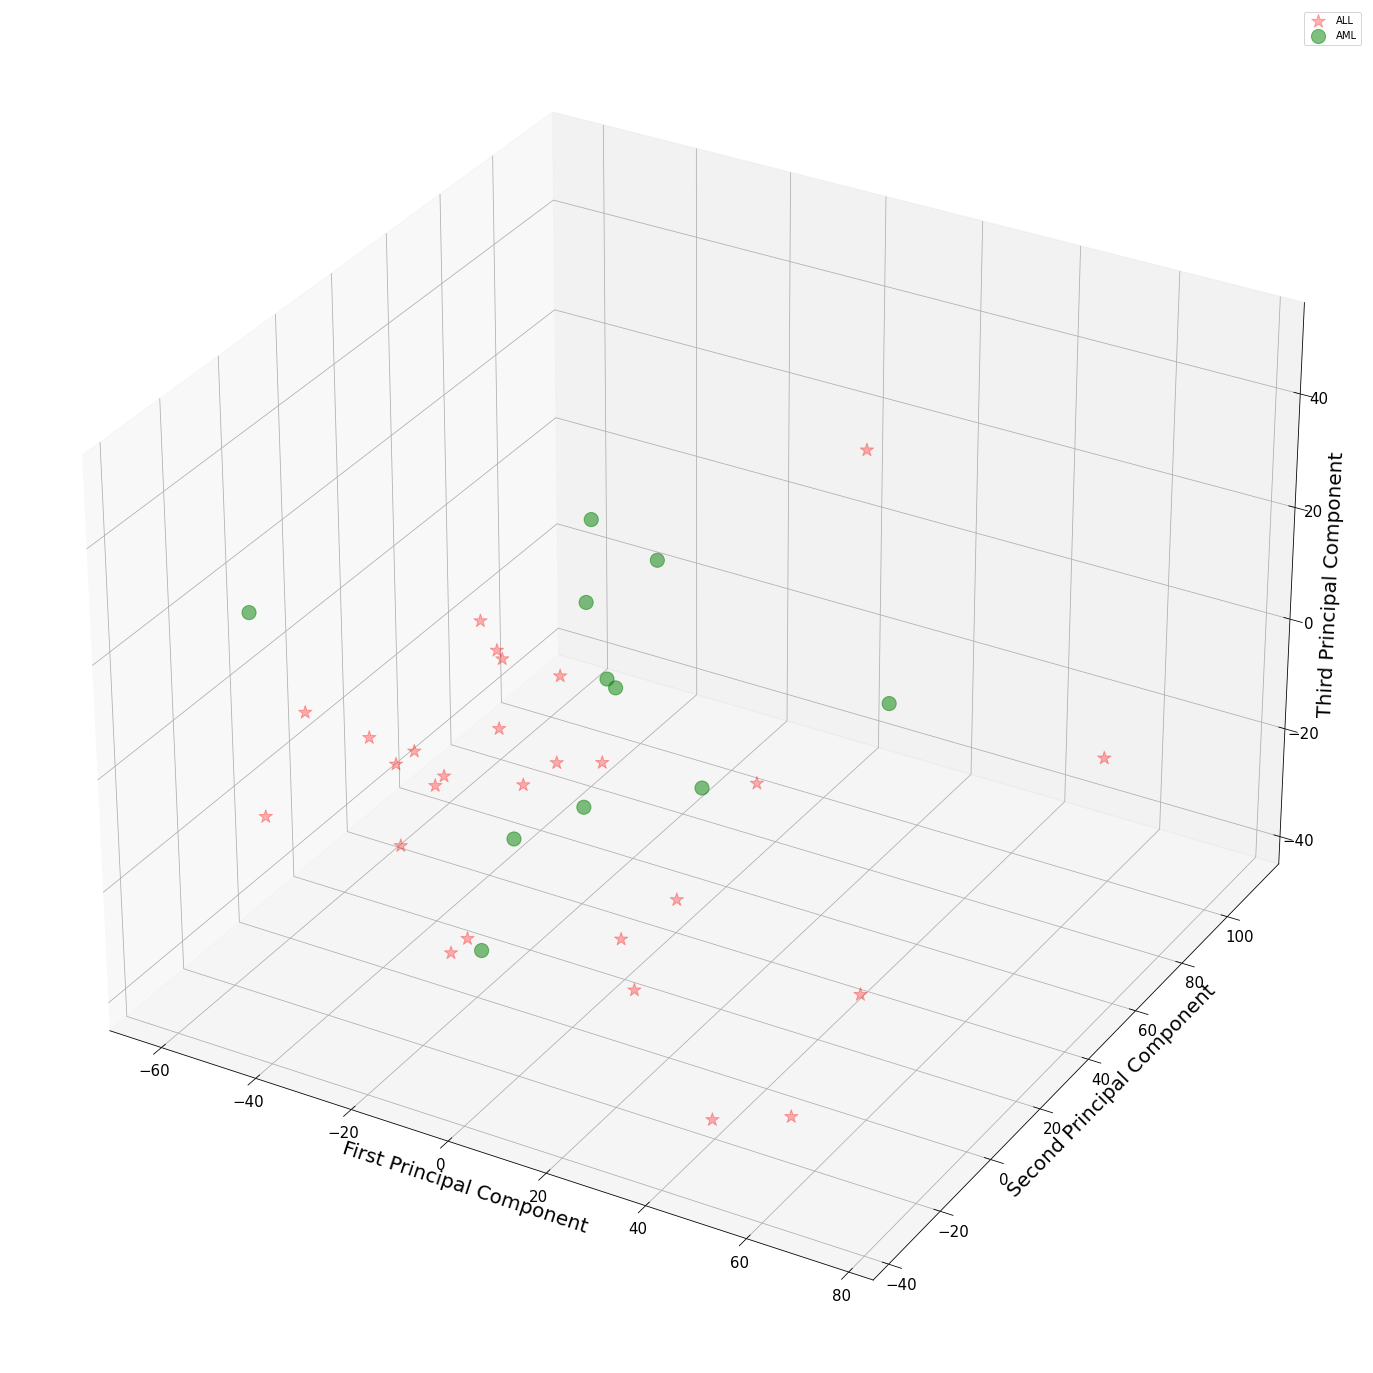

In [106]:
ex_variance=np.var(df_train_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

X = df_train.drop(["patient","cancer"],axis=1)
y = df_train["cancer"]

Xax = X_train[:,0]
Yax = X_train[:,1]
Zax = X_train[:,2]

cdict = {'ALL':'red','AML':'green'}
labl = {'ALL':'ALL','AML':'AML'}
marker = {'ALL':'*','AML':'o'}
alpha = {'ALL':.3, 'AML':.5}

fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for i in np.unique(y):
    ix=np.where(y==i)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[i], s=200,
           label=labl[i], marker=marker[i], alpha=alpha[i])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=20)
ax.tick_params(labelsize=15)
ax.set_ylabel("Second Principal Component", fontsize=20)
ax.set_zlabel("Third Principal Component", fontsize=20)

ax.legend()
plt.show()


# Machine Learning Algorithms

# With PCA

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [108]:
y_train = df_train['cancer'].replace(['ALL', 'AML'],[0,1])
y_test = df_test['cancer'].replace(['ALL', 'AML'],[0,1])


LG = LogisticRegression()
LG.fit(X_train,y_train)

LogisticRegression()

In [109]:
# Predition
y_predictions = LG.predict(x_test)
print(accuracy_score(y_test,y_predictions))

0.5


# With no PCA


In [110]:
X_test_no_pca = df_test.drop(["cancer", "patient"],axis=1)
X_train_no_pca = df_train.drop(["cancer", "patient"],axis=1)
LG1 = LogisticRegression()
LG1.fit(X_train_no_pca,y_train)
y_predictions = LG1.predict(X_test_no_pca)
print(accuracy_score(y_test,y_predictions))

0.9705882352941176


# SVM

In [111]:
from sklearn.svm import SVC

## With PCA processed data and then try on different kernels

In [112]:
#rbf
classifier_svm_kernel = SVC(kernel='rbf')
classifier_svm_kernel.fit(X_train,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5588235294117647


In [113]:
#sigmoid
classifier_svm_kernel = SVC(kernel='sigmoid')
classifier_svm_kernel.fit(X_train,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5882352941176471


In [114]:
#poly
classifier_svm_kernel = SVC(kernel='poly')
classifier_svm_kernel.fit(X_train,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5882352941176471


## With no PCA processed data

In [115]:
#rbf
classifier_svm_kernel = SVC(kernel='rbf')
classifier_svm_kernel.fit(X_train_no_pca,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test_no_pca)
print(accuracy_score(y_test,y_pred))

0.6176470588235294


In [116]:
#sigmoid
classifier_svm_kernel = SVC(kernel='sigmoid')
classifier_svm_kernel.fit(X_train_no_pca,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test_no_pca)
print(accuracy_score(y_test,y_pred))

0.5882352941176471


In [117]:
#poly
classifier_svm_kernel = SVC(kernel='poly')
classifier_svm_kernel.fit(X_train_no_pca,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test_no_pca)
print(accuracy_score(y_test,y_pred))

0.7352941176470589


# Conclusion
According to the results, we can come to some conclusions as following:
<br> In training data and testing data without processing PCA give the result with higher accuracy.
<br> Logistic Regression using data without PCA gives the highet accuracy score with up to 97%.